In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

%reload_ext autoreload
%autoreload 2
%reload_kedro

2021-01-06 09:15:15,496 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2021-01-06 09:15:15,697 - root - INFO - ** Kedro project spaceflights
2021-01-06 09:15:15,698 - root - INFO - Defined global variable `context`, `session` and `catalog`
2021-01-06 09:15:15,706 - root - INFO - Registered line magic `run_viz`


In [5]:
ls_df = catalog.load("listings")

2021-01-06 09:15:15,769 - kedro.io.data_catalog - INFO - Loading data from `listings` (CSVDataSet)...


/Users/minhtran/Documents/WORK/training/minhtran/data-learning/kedro/env-kedro/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
ls_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
def remove_sign(x, sign):
    if type(x) is str:
        x = float(x.replace(sign, '').replace(',',''))
    return x

/Users/minhtran/Documents/WORK/training/minhtran/data-learning/kedro/env-kedro/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
ls_df = ls_df[['price', 'property_type']]
print(type(ls_df))

<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Price ($)')

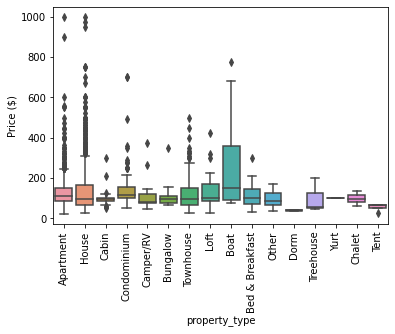

In [9]:
ls_df.price = ls_df.price.apply(remove_sign, sign='$')
sns.boxplot(y='price', x='property_type', data=ls_df)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [10]:
def remove_outlier_IQR(df: pd.DataFrame):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    df_final = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

/Users/minhtran/Documents/WORK/training/minhtran/data-learning/kedro/env-kedro/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-01-06 09:15:23,003 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


Text(0, 0.5, 'Price ($)')

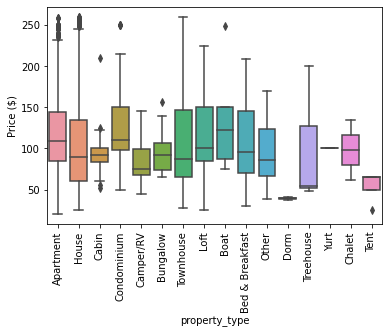

In [11]:
df_outlier_removed = remove_outlier_IQR(ls_df.price)
df_outlier_removed = pd.DataFrame(df_outlier_removed)
ind_diff = ls_df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final = ls_df.drop([ind_diff[i]])
    ls_df = df_final

sns.boxplot(y='price', x='property_type',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')


In [12]:
len(ind_diff)

/Users/minhtran/Documents/WORK/training/minhtran/data-learning/kedro/env-kedro/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


246

In [13]:
len(ls_df)

3572

In [14]:
def remove_outlier_Hampel(df):
    med=df.median()
    List=abs(df-med)
    cond=List.median()*4.5
    good_list=List[~(List>cond)]
    return good_list


Text(0, 0.5, 'Price ($)')

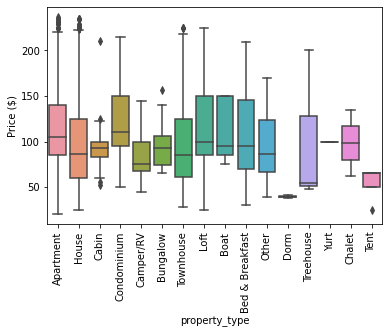

In [15]:
df = ls_df
df_outlier_removed=remove_outlier_Hampel(df.price)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
    
sns.boxplot(y='price', x='property_type',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [16]:
from sklearn.cluster import DBSCAN
def remove_outliers_DBSCAN(df) -> pd.DataFrame:
    outlier_detection = DBSCAN(eps = 0.5, min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']


/Users/minhtran/Documents/WORK/training/minhtran/data-learning/kedro/env-kedro/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
df = catalog.load("listings")
df.price = df.price.apply(remove_sign, sign='$')

clusters = remove_outliers_DBSCAN((df['price']))
clusters.value_counts().sort_values(ascending=False)


2021-01-06 09:15:34,784 - kedro.io.data_catalog - INFO - Loading data from `listings` (CSVDataSet)...


/Users/minhtran/Documents/WORK/training/minhtran/data-learning/kedro/env-kedro/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-1      275
 1      162
 2      159
 16     118
 9      110
       ... 
 68       5
 123      5
 126      5
 124      5
 111      5
Name: cluster, Length: 130, dtype: int64

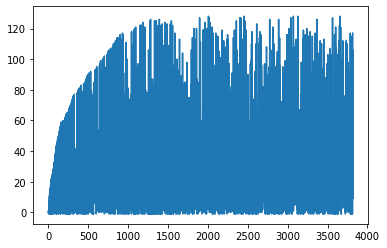

In [21]:
plt.plot(clusters)

In [22]:
df_cluster = pd.DataFrame(clusters)
ind_outlier = df_cluster.index[df_cluster['cluster'] == -1]
ind_outlier

Int64Index([   2,   14,   19,   24,   33,   36,   41,   46,   52,   53,
            ...
            3629, 3632, 3671, 3673, 3724, 3787, 3794, 3798, 3810, 3813],
           dtype='int64', length=275)

/Users/minhtran/Documents/WORK/training/minhtran/data-learning/kedro/env-kedro/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Price ($)')

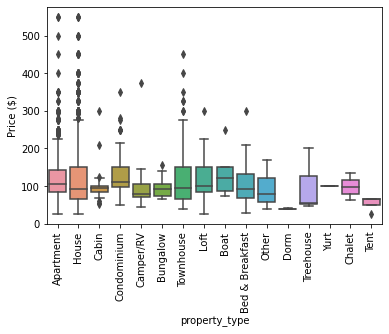

In [23]:
for i in range(0, len(ind_outlier),1):
    df_final = df.drop([ind_outlier[i]])
    df = df_final
    
sns.boxplot(y='price', x='property_type', data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')